<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span><ul class="toc-item"><li><span><a href="#Предендент-на-лучшую-модель" data-toc-modified-id="Предендент-на-лучшую-модель-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Предендент на лучшую модель</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span><ul class="toc-item"><li><span><a href="#Результат" data-toc-modified-id="Результат-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Результат</a></span></li></ul></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score 
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 


import matplotlib.pyplot as plt
import seaborn as sns

## Подготовка данных

In [4]:
data = pd.read_csv('/Users/glebkomissarov/Downloads/Churn.csv')

In [5]:
print(data.shape)
data.head(5)

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


**Имеем 5 категориальных (Geography  , Gender  , HasCrCard  , IsActiveMember, NumOfProducts) и 6 количественных (CreditScore, Age, Tenure, Balance)**

**CustomerId и RowNumber вроде нельзя отнести к категориальным и тем более к количественным... Поэтому их можно убрать**

In [6]:
data.drop(['CustomerId', 'RowNumber', 'Surname'], axis = 1, inplace = True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           9091 non-null   float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


**Есть пропуски в поле Tenure (сколько лет, человек является клиентом банка)**

In [8]:
print('Geography check\n', data['Geography'].value_counts(), '\n\n')
print('Gender check\n', data['Gender'].value_counts(), '\n\n')
print('HasCrCard check\n', data['HasCrCard'].value_counts(), '\n\n')
print('IsActiveMember check\n', data['IsActiveMember'].value_counts(), '\n\n')
print('NumOfProducts check\n', data['NumOfProducts'].value_counts())

Geography check
 France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64 


Gender check
 Male      5457
Female    4543
Name: Gender, dtype: int64 


HasCrCard check
 1    7055
0    2945
Name: HasCrCard, dtype: int64 


IsActiveMember check
 1    5151
0    4849
Name: IsActiveMember, dtype: int64 


NumOfProducts check
 1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64


**Ни в одном из категориальных атрибутов нет пропусков. Хорошо**

**Преобразуем Gender и Geography с помощью get_dummies** 

In [9]:
data = pd.get_dummies(data, columns=['Geography','Gender'], drop_first=True)

In [10]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [11]:
print('Is null', pd.Series(data['CreditScore']).isnull().value_counts(), '\n')
print('Is null', pd.Series(data['Age']).isnull().value_counts(), '\n')
print('Is null', pd.Series(data['Tenure']).isnull().value_counts(), '\n')
print('Is null', pd.Series(data['NumOfProducts']).isnull().value_counts(), '\n')
print('Is null', pd.Series(data['HasCrCard']).isnull().value_counts(), '\n')
print('Is null', pd.Series(data['IsActiveMember']).isnull().value_counts(), '\n')
print('Is null', pd.Series(data['EstimatedSalary']).isnull().value_counts(), '\n')
print('Is null', pd.Series(data['Exited']).isnull().value_counts(), '\n')
print('Is null', pd.Series(data['Geography_Germany']).isnull().value_counts(), '\n')
print('Is null', pd.Series(data['Geography_Spain']).isnull().value_counts(), '\n')
print('Is null', pd.Series(data['Gender_Male']).isnull().value_counts(), '\n')


Is null False    10000
Name: CreditScore, dtype: int64 

Is null False    10000
Name: Age, dtype: int64 

Is null False    9091
True      909
Name: Tenure, dtype: int64 

Is null False    10000
Name: NumOfProducts, dtype: int64 

Is null False    10000
Name: HasCrCard, dtype: int64 

Is null False    10000
Name: IsActiveMember, dtype: int64 

Is null False    10000
Name: EstimatedSalary, dtype: int64 

Is null False    10000
Name: Exited, dtype: int64 

Is null False    10000
Name: Geography_Germany, dtype: int64 

Is null False    10000
Name: Geography_Spain, dtype: int64 

Is null False    10000
Name: Gender_Male, dtype: int64 



In [12]:
print('Geography check\n', data['Tenure'].value_counts(), '\n\n')

Geography check
 1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64 




**У поля Tenure 909 None, их надо либо заменить, но так можно исказить результат, либо убрать эти строки из выборки, но так уйдет почти 10% выборки.**

Text(0, 0.5, 'Tenure Frequency')

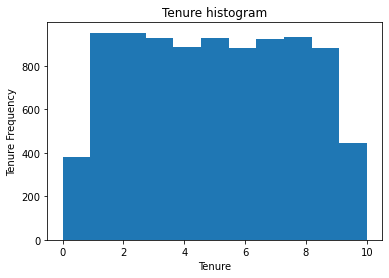

In [13]:
fig = pd.Series(data['Tenure']).plot(kind = 'hist', bins = 11, title = 'Tenure histogram')
fig.set_xlabel('Tenure')
fig.set_ylabel('Tenure Frequency')

**Заполнение значением может сильно исказить результат, а вот удаление особо повлиять не должно... Наверное...**

In [14]:
data_new = data.drop(data[data['Tenure'].isnull() == True].index)

In [15]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        9091 non-null   int64  
 1   Age                9091 non-null   int64  
 2   Tenure             9091 non-null   float64
 3   Balance            9091 non-null   float64
 4   NumOfProducts      9091 non-null   int64  
 5   HasCrCard          9091 non-null   int64  
 6   IsActiveMember     9091 non-null   int64  
 7   EstimatedSalary    9091 non-null   float64
 8   Exited             9091 non-null   int64  
 9   Geography_Germany  9091 non-null   uint8  
 10  Geography_Spain    9091 non-null   uint8  
 11  Gender_Male        9091 non-null   uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 736.9 KB


In [16]:
print('Is null', pd.Series(data_new['Tenure']).isnull().value_counts(), '\n')

Is null False    9091
Name: Tenure, dtype: int64 



In [17]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance']

In [18]:
#corel = sns.pairplot(data, hue = 'Exited')

**Корреляции в данных не видно**

In [19]:
features = data_new.drop('Exited', axis = 1)
target = data_new['Exited']

In [20]:
features.shape

(9091, 11)

In [21]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size = 0.4, random_state = 12345)

In [22]:
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size = 0.50, random_state = 12345)

**Итого: тренировочная - 60%, валидационная - 20%, тестовая - 20%**

In [23]:
print(features_train.shape)
print(target_train.shape)

(5454, 11)
(5454,)


In [24]:
print(features_valid.shape)
print(target_valid.shape)

(1818, 11)
(1818,)


In [25]:
print(features_test.shape)
print(target_test.shape)

(1819, 11)
(1819,)


In [26]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

/Users/glebkomissarov/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


Я так понимаю, меня предупреждают, что я изменяю срез датасета и это *не есть хорошо* и лучше делать это все через .loc

Есть ли смысл переделывать?

## Исследование задачи

0    7963
1    2037
Name: Exited, dtype: int64


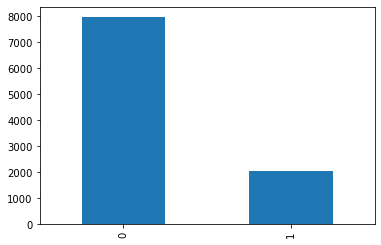

In [27]:
exit_count = data['Exited'].value_counts()
exit_count.plot(kind = 'bar')
print(exit_count)

В target приемущественно 0 - то есть оставшиеся клиенты

1    5457
0    4543
Name: Gender_Male, dtype: int64


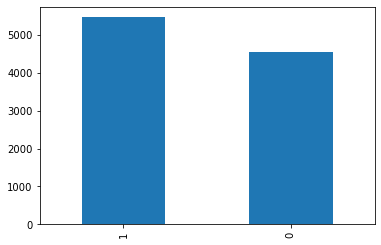

In [28]:
gender_count = data['Gender_Male'].value_counts()
gender_count.plot(kind = 'bar')
print(gender_count)

По полу дисбаланса нет

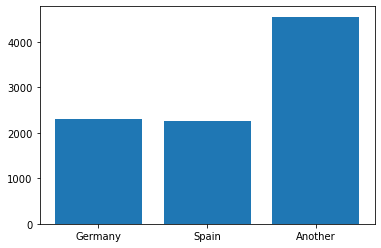

In [29]:
country_count = data['Geography_Germany'].value_counts()
country_count2 = data["Geography_Spain"].value_counts()

# 2293 Germany, 2248 Spain, 4550 - another country
countries_count = {'Germany': 2293, 'Spain' : 2248, 'Another' : 4550}

names = list(countries_count.keys())
values = list(countries_count.values())

plt.bar(range(len(countries_count)), values, tick_label = names)
plt.show()

#print(country_count, '\n', country_count2)

Людей из третьей страны столько же сколько и людей из Германии + Испании

1    5151
0    4849
Name: IsActiveMember, dtype: int64


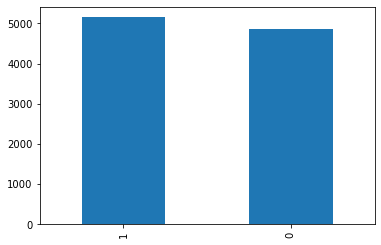

In [30]:
active_count = data['IsActiveMember'].value_counts()
active_count.plot(kind = 'bar')
print(active_count)


1    7055
0    2945
Name: HasCrCard, dtype: int64


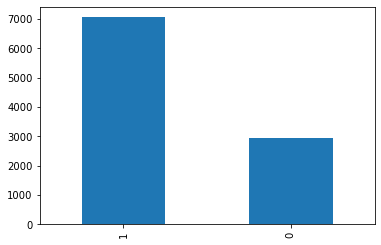

In [31]:
ct_card_count = data['HasCrCard'].value_counts()
ct_card_count.plot(kind = 'bar')
print(ct_card_count)

In [32]:
model = LogisticRegression(solver='liblinear', random_state = 12345)
model.fit(features_train, target_train)

model_2 = DecisionTreeClassifier(random_state=12345)
model_2.fit(features_train, target_train)

DecisionTreeClassifier(random_state=12345)

0    1818
dtype: int64


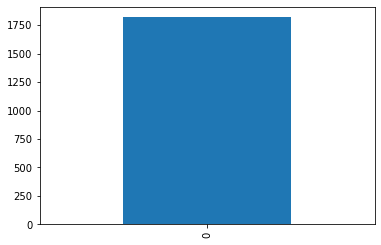

In [33]:
# Для LogisticRegression
predicted_valid = pd.Series(model.predict(features_valid))

class_frequency = predicted_valid.value_counts()
class_frequency.plot(kind = 'bar')
print(class_frequency)

0    1818
dtype: int64


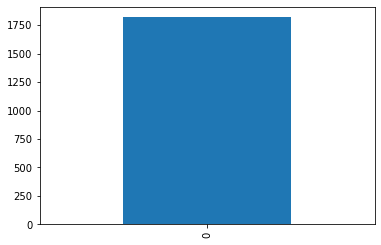

In [34]:
# Для LogisticRegression
predicted_valid_2 = model_2.predict(features_valid)

class_frequency_2 = pd.Series(predicted_valid_2).value_counts()
class_frequency.plot(kind = 'bar')
print(class_frequency)

In [35]:
target_pred_constant = pd.Series(0, index=target.index)
print(round(accuracy_score(target, target_pred_constant), 4))

0.7961


In [36]:
print(accuracy_score(target, target_pred_constant))

0.7960620393796062


In [37]:
print(confusion_matrix(target_valid, predicted_valid))

[[1441    0]
 [ 377    0]]


In [38]:
print(confusion_matrix(target_valid, predicted_valid_2))

[[1252  189]
 [ 192  185]]


**Очень много TN ответов**

In [39]:
print('Recall:', '\t', round(recall_score(target_valid, predicted_valid), 4)) 
print('Precision:', '\t', round(precision_score(target_valid, predicted_valid), 4)) 
print('F1 score:', '\t', round(f1_score(target_valid, predicted_valid), 4)) 

Recall: 	 0.0
Precision: 	 0.0
F1 score: 	 0.0


/Users/glebkomissarov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
print('Recall:', '\t', round(recall_score(target_valid, predicted_valid_2), 4)) 
print('Precision:', '\t', round(precision_score(target_valid, predicted_valid_2), 4)) 
print('F1 score:', '\t', round(f1_score(target_valid, predicted_valid_2), 4)) 

Recall: 	 0.4907
Precision: 	 0.4947
F1 score: 	 0.4927


# Выводы. Исследование задачи. 

У Target класса почти в четыре раза больше строк с 0. Соотношение такое 0 - 7237, 1 - 1854. Явный дисбаланс. 

Матрица ошибок у обоих моделей показывает значительный перевес в сторону TN ответов, что говорит о дисбалансе.

Метрики полноты, точности и f1 показывают нулевые значения для модели LogisticRegression 

Те же метрики для модели DecisionTreeClassifier показывают значения 0.49 (не плохо, но и не особо хорошо)

## Борьба с дисбалансом

### Logistic Regression

In [41]:
best_result_1 = 0
#best_solv_1 = 'liblinear'

solvers = ['lbfgs']


for maxx in range(1, 50, 10):
    for solv in solvers:
        model_1 = LogisticRegression(random_state = 12345, class_weight = 'balanced', solver = solv
                                         , max_iter = maxx)
                                         #, min_weight_fraction_leaf = i)
        model_1.fit(features_train, target_train)
        predicted_valid = model_1.predict(features_valid)
        f1_1 = f1_score(target_valid, predicted_valid)
        if f1_1 > best_result_1:
            best_result_1 = f1_1
            best_model_1 = model_1
            best_model_result_1 = predicted_valid
            best_solv_1 = solv
            best_iter_1 = maxx

                
print(best_result_1, best_solv_1, best_iter_1)

0.34350797266514804 lbfgs 1


/Users/glebkomissarov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
model = LogisticRegression(solver='newton-cg', random_state = 12345, class_weight = 'balanced', max_iter = 21)
model.fit(features_train, target_train)

/Users/glebkomissarov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


LogisticRegression(class_weight='balanced', max_iter=21, random_state=12345,
                   solver='newton-cg')

In [43]:
predicted_valid = model.predict(features_valid)
print('F1 score:', '\t', round(f1_score(target_valid, predicted_valid), 4)) 

print(confusion_matrix(target_valid, predicted_valid))

F1 score: 	 0.5132
[[1030  411]
 [ 105  272]]


Результат улучшился с 0 до 0.5 - это хорошо! 

In [44]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

# < напишите код здесь >
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

0.7793530502138032


In [45]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.8, 0.05):
    predicted_valid = probabilities_one_valid > threshold 
    f1 = f1_score(target_valid, predicted_valid)
    
    print(threshold, f1)

0.0 0.34350797266514804
0.05 0.34350797266514804
0.1 0.3438212494300046
0.15000000000000002 0.3484708063021316
0.2 0.36301703163017035
0.25 0.3808033385498174
0.30000000000000004 0.40940366972477066
0.35000000000000003 0.44015444015444016
0.4 0.4650499286733239
0.45 0.48772504091653024
0.5 0.5132075471698113
0.55 0.5186813186813186
0.6000000000000001 0.4967490247074122
0.65 0.46567164179104475
0.7000000000000001 0.36713286713286714
0.75 0.29862475442043224


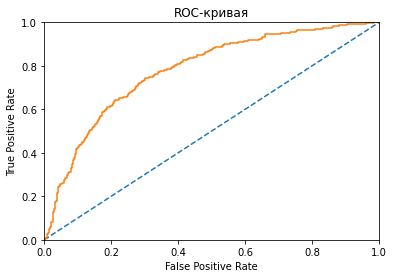

In [46]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)  
plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

In [47]:
features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]

print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

(4328, 11)
(1126, 11)
(4328,)
(1126,)


Чтобы у выборок был примерно одинаковыый размер нужно при увеличении умножить фичер_онес на 4, а при уменьшении фичерс_зероя на 0.3, тогда будет примерно одинаковый размер

In [48]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros]  + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [49]:
model = LogisticRegression(solver='lbfgs', random_state = 12345)

features_upsampled, target_upsampled = upsample(features_train, target_train,  4)

model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('F1 score:', '\t', round(f1_score(target_valid, predicted_valid), 4)) 

print(confusion_matrix(target_valid, predicted_valid))

F1 score: 	 0.3435
[[   0 1441]
 [   0  377]]


тоже хорошо

In [50]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

# < напишите код здесь >
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

0.4951836791794675


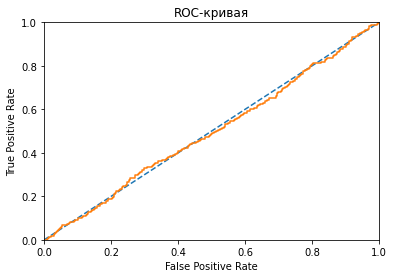

In [51]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)  
plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

In [52]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

### DecisionTreeClassifier

best_result = 0

criteria = ['gini', 'entropy']
splitters = ['random', 'best']

for depth in range(1, 15):
    for crit in criteria:
        for split in splitters:
            for leaf in range(25, 55):
                    model_2 = DecisionTreeClassifier(random_state = 12345, class_weight = 'balanced', criterion = crit
                                                     , max_depth = depth, min_samples_split = 2, min_samples_leaf = leaf
                                                     , splitter = split)
                    model_2.fit(features_train, target_train)
                    predicted_valid = model_2.predict(features_valid)
                    f1 = f1_score(target_valid, predicted_valid)
                    if f1 > best_result:
                        print(f1)
                        best_result = f1
                        best_model = model_2
                        best_model_result = predicted_valid
                        best_crit = crit
                        best_depth = depth
                        best_ms = 2
                        best_leaf = leaf
                        best_splitt = split
                        
                
print(best_result, best_crit, best_depth, best_ms, best_leaf, best_splitt)


print('F1 score:', '\t', round(f1_score(target_valid, best_model_result), 4)) 

print(confusion_matrix(target_valid, best_model_result))

probabilities_valid = best_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

# < напишите код здесь >
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)  # < напишите код здесь >

plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

#### Предендент на лучшую модель

In [57]:
best_result_3 = 0

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
criteria = ['gini', 'entropy']
splitters = ['best', 'random']

for depth in range(1, 15):
    for crit in criteria:
        for splitt in splitters:
        #for split in range(2, 20):
            for leaf in range(25, 45):
                    model_3 =  DecisionTreeClassifier(random_state = 12345, criterion = crit, max_depth = depth
                                                     , min_samples_split = 2, min_samples_leaf = leaf
                                                     , splitter = splitt)

                    model_3.fit(features_upsampled, target_upsampled)
                    predicted_valid_3 = model_3.predict(features_valid)
                    f1 = f1_score(target_valid, predicted_valid_3)
                    if f1 > best_result_3:
                        print(f1)
                        best_model_3 = model_3
                        best_model_result_3 = predicted_valid_3
                        best_result_3 = f1
                        best_crit_3 = crit
                        best_depth_3 = depth
                        best_ms_3 = 2
                        best_leaf_3 = leaf
                        best_splitt_3 = splitt
                        print(best_result_3, best_crit_3, best_depth_3, best_ms_3, best_leaf_3, best_splitt_3)

print(best_result_3, best_crit_3, best_depth_3, best_ms_3, best_leaf_3)

print('F1 score:', '\t', round(f1_score(target_valid, best_model_result_3), 4)) 
print(confusion_matrix(target_valid, best_model_result_3))

0.5065856129685917
0.5065856129685917 gini 1 2 25 best
0.5297619047619048
0.5297619047619048 gini 2 2 25 best
0.5504782146652497
0.5504782146652497 gini 3 2 25 best
0.5660749506903353
0.5660749506903353 entropy 4 2 25 best
0.5756613756613755
0.5756613756613755 gini 5 2 25 best
0.5762711864406779
0.5762711864406779 gini 5 2 26 best
0.5779543197616683
0.5779543197616683 gini 7 2 25 random
0.5944272445820433
0.5944272445820433 gini 7 2 28 random
0.5997719498289624
0.5997719498289624 gini 8 2 32 best
0.6031746031746031
0.6031746031746031 gini 8 2 36 best
0.6054852320675106
0.6054852320675106 entropy 9 2 28 random
0.6148867313915858
0.6148867313915858 entropy 10 2 44 random
0.6148867313915858 entropy 10 2 44
F1 score: 	 0.6149
[[1176  265]
 [  92  285]]


In [58]:
probabilities_valid = model_3.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

# < напишите код здесь >
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

0.8444741623209641


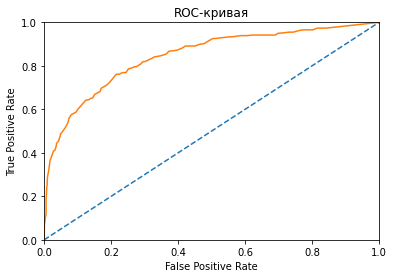

In [59]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)  

plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

In [60]:

print('F1 score:', '\t', round(f1_score(target_valid, best_model_result), 4)) 
print(confusion_matrix(target_valid, best_model_result))

print('F1 score:', '\t', round(f1_score(target_valid, best_model_result_3), 4)) 
print(confusion_matrix(target_valid, best_model_result_3))

F1 score: 	 0.6047
[[1165  276]
 [  94  283]]
F1 score: 	 0.6149
[[1176  265]
 [  92  285]]


У первой модели DecisionTreeClassifier результат слега выше. Ее и будем использовать

In [61]:
best_result_4 = 0

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.3)
criteria = ['gini', 'entropy']

for depth in range(1, 15):
    for crit in criteria:
        for split in splitters:
            for leaf in range(15, 45): 
                model_4 = DecisionTreeClassifier(random_state = 12345, criterion = crit, max_depth = depth
                                                 , min_samples_split = 2, min_samples_leaf = leaf, splitter = split)
                
                model_4.fit(features_downsampled, target_downsampled)
                predicted_valid_4 = model_4.predict(features_valid)
                f1 = f1_score(target_valid, predicted_valid_4)
                if f1 > best_result_4:
                    
                    print('New best', f1)
                    best_model_4 = model_4
                    best_model_result_4 = predicted_valid_4
                    best_result_4 = f1
                    best_crit_4 = crit
                    best_depth_4 = depth
                    best_ms_4 = 2
                    best_leaf_4 = leaf
                    best_splitt_4 = split
                    print(best_result_4, best_crit_4, best_depth_4, best_ms_4, best_leaf_4)

print(best_result_4, best_crit_4, best_depth_4, best_ms_4, best_leaf_4)

print('F1 score:', '\t', round(f1_score(target_valid, best_model_result_4), 4)) 
print(confusion_matrix(target_valid, best_model_result_4))

New best 0.49809160305343514
0.49809160305343514 gini 1 2 15
New best 0.5145539906103286
0.5145539906103286 gini 2 2 15
New best 0.533066132264529
0.533066132264529 gini 3 2 15
New best 0.5491803278688524
0.5491803278688524 entropy 3 2 15
New best 0.5544933078393882
0.5544933078393882 entropy 4 2 15
New best 0.5656154628687691
0.5656154628687691 gini 5 2 15
New best 0.5738045738045738
0.5738045738045738 gini 5 2 20
New best 0.5919477693144721
0.5919477693144721 entropy 5 2 15
New best 0.5921908893709328
0.5921908893709328 gini 7 2 16
New best 0.5973451327433628
0.5973451327433628 gini 7 2 32
New best 0.5995423340961099
0.5995423340961099 gini 9 2 32
0.5995423340961099 gini 9 2 32
F1 score: 	 0.5995
[[1206  235]
 [ 115  262]]


In [62]:
model_t = DecisionTreeClassifier(random_state = 12345, criterion = 'entropy', max_depth = 6
                                                 , max_leaf_nodes = 19, min_samples_leaf = 20)
model.fit(features_downsampled, target_downsampled)
predicted_valid_t = model_4.predict(features_valid)
f1_t = f1_score(target_valid, predicted_valid_4)
print(f1_t)

0.5248091603053435


In [63]:
probabilities_valid = model_4.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(auc_roc)

0.8051686402568213


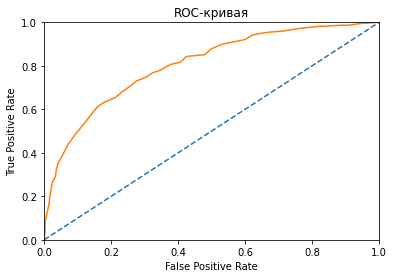

In [64]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)  # < напишите код здесь >

plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

# Выводы. Борьба с дисбалансом 

Для LogisticRegression самое высокое значение f1 метрики при добавлении в модель параметра class_weight = 'balanced' - 0.51 и с вероятностью 77% будет давать положительный прогноз.

Увеличение/уменьшение выборки тоже дают значительное улучшение (в сравнении с самым первым результатом (там был 0)), но они все равно имеют меньшее значение метрики f1 - всего 0.34. И вероятности получить положительный прогноз для этих моделей всего 50%. 


**Для DecisionTreeClassifier самое высокое значение f1 метрики было для способа с увеличением выборки получилось 0.6252**, а вероятность получить положительный прогноз равна 80%, варианты с увеличением и с уменьшением и class_weight = balanced модели показывают почти такой же хороший результат f1 ~0.60, но вероятности получить хороший прогноз меньше 76%


Тест будет проходит на модель DecisionTreeClassifier

## Тестирование модели

### DecisionTreeClassifier

In [65]:
#gini 11 2 39 random

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
model_3 =  DecisionTreeClassifier(random_state = 12345, criterion = 'gini', max_depth = 11
                                                     , min_samples_split = 2, min_samples_leaf = 39
                                                     , splitter = 'random')

model_3.fit(features_upsampled, target_upsampled)
mod_pr = model_3.predict(features_valid)
best_predicted = model_3.predict(features_test)
print('F1 score:', '\t', round(f1_score(target_valid, mod_pr), 4)) 
print('F1 score:', '\t', round(f1_score(target_test, best_predicted), 4)) 

F1 score: 	 0.5787
F1 score: 	 0.5624


#### Результат 
**На тренировочной выборке получилось сделать модель, дающую f1 меру = .625, тестовой макс результат - .597**

### Конец